## 무임승차 정책 개선을 위한 서울시 지하철 승차 현황 분석; 서울교통공사를 중심으로

**데이터 분석 목적**\
<서울시 지하철 무임승차 현황 분석>
- 노인 지하철 무임승차는 꾸준한 뜨거운 감자이다. 정책에 대한 이견이 충돌되며 지속적으로 논란이 되고 있어 실제 서울시 지하철 승차 현황을 파악해보고자 해당 프로젝트를 진행한다.
- 서울교통공사의 제정적 위기에 대하여 무임승차 제도가 어느정도 영향을 미치는지 현황을 파악한다. 무임승차 비용이 서울교통 공사의 적자에 미치는 비율을 알아봄으로써, 서울 교통 공사의 적자 대비 무임승차비용의 비중을 알아볼 수 있다.

**처리 사항**
1. 연간 서울교통공사 매출액 및 손실율 추이 파악 (2017-2021)
>-서울교통공사 재무제표(2017-2021) → 연간 매출액 및 손실액 추출
2. 서울시 전체 인구수 대비 서울시 노령 인구수 분석 (1984-2021) 
>-인구추이(주민등록인구)(1984-2021)
>**[데이터 범주 시작점(1984): 65세 이상 노인층의 무임승차가 시작된 시기]**

3. 서울교통공사의 지하철 총 무임비용 대비 노인 무임비용의 비율 분석
>-무임승차_대상별_현황 (2017-2021) → 서울교통공사 데이터 추출
4. 연간승차자 대비 무임승차자 분석(2017-2021)
>-서울시 지하철 호선별 역별 유_무임 승하차 인원 정보(2015 - 2022)
→ 2017년 이후 1호선~8호선 데이터 추출
5. 지하철 호선별 연간승차자와 무임승차자 분석 (2017-2021)
>-서울시 지하철 호선별 역별 유_무임 승하차 인원 정보(2015 - 2022)
→ 2017년 이후 1호선~8호선 데이터 추출
6. 연간 별 서울교통공사 적자 비용 대비 노인 무임비용 비율 분석
>-서울교통공사 재무제표(2017-2021)
무임승차_대상별_현황 (2017-2021) → 서울교통공사 데이터 추출

**참조**
>- **서울교통공사 출범일자는 2017.05.31, 따라서 데이터의 범주 범위는 2017 부터 시작됨**
>- **서울교통공사가 운행하는 지하철 노선은 서울시 지하철 1 ~ 8호선 따라서 1 ~ 8호선만 데이터 분석에 활용**
>- **노인 지하철 무임승차에 대한 이슈가 많은 점을 고려하여 총 무임승차 비용 내에서 노인 무임승차 비용을 중심으로 데이터 분석**

**활용데이터**
1. 무임승차_대상별_현황 (2017-2021)  (출처 : 한국철도통계, 한국철도공사 https://kosis.kr/statHtml/statHtml.do?tblId=DT_357001_A027&orgId=357&language=kor&conn_path=&vw_cd=&list_id)  
2. 인구추이(주민등록인구)(1984-2021)(출처 서울 열린 데이터 광장 https://data.seoul.go.kr/dataList/418/S/2/datasetView.do)
3. 서울교통공사 재무제표 (2017-2021) (출처 : 서울교통공사 http://www.seoulmetro.co.kr/kr/page.do?menuIdx=110)
4. 서울시 지하철 호선별 역별 유_무임 승하차 인원 정보  (57395행 8열) (출처 : 서울 열린데이터 광장http://data.seoul.go.kr/dataList/OA-12251/S/1/datasetView.do)

**수행도구**
 pandas, ipynb, excel


In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [4]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 1. 연간 서울교통공사 매출액 및 손실율 추이 파악 (2017-2021)



**활용 데이터 서울교통공사 재무제표(2017-2021) → 연간 매출액 및 적자비용 추출**

**2017년 자료 2017.05.31~2017.12.31**

**서울교통공사 출범일 2017.05.31**

**단위 : 백만원** 


**데이터 작성**

In [5]:
data = {'2017':[1145373, 407415], 
       '2018':[1986511, 538892], 
       '2019':[2004643, 586467], 
       '2020':[1559524, 1113736], 
       '2021':[1629129, 964440]}

In [6]:
budget= pd.DataFrame(data=data, index=['매출액', '손실액'])
budget

,2017,2018,2019,2020,2021
매출액,1145373,1986511,2004643,1559524,1629129
손실액,407415,538892,586467,1113736,964440


**서울교통공사 연간 매출액 & 손실액 시각화**

<AxesSubplot:>

Text(0.5, 1.0, '서울교통공사 연간 매출액 & 손실액')

Text(0, 0.5, '단위: 0.4=4천억 / 2.0=2조')

,2017,2018,2019,2020,2021
매출액,1145373,1986511,2004643,1559524,1629129
손실액,407415,538892,586467,1113736,964440


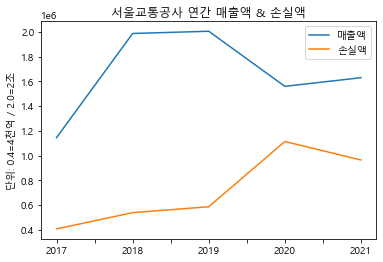

In [141]:
budget.T.plot()
plt.title('서울교통공사 연간 매출액 & 손실액')
plt.ylabel('단위: 0.4=4천억 / 2.0=2조')
budget

**연간 매출액 대비 손실액 비율 구하기**

**손실액 비율(단위 : %) : 손실액 / 매출액 *100**

In [8]:
lratio = round(budget.iloc[1] / budget.iloc[0]*100, 2)#round 소수점 두번째 수까지 표현
lratio

2017    35.57
2018    27.13
2019    29.26
2020    71.42
2021    59.20
dtype: float64

In [9]:
budget2= budget.append(lratio, ignore_index=True)
budget2

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27248\966280616.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  budget2= budget.append(lratio, ignore_index=True)


,2017,2018,2019,2020,2021
0,1145373.00,1986511.00,2004643.00,1559524.00,1629129.0
1,407415.00,538892.00,586467.00,1113736.00,964440.0
2,35.57,27.13,29.26,71.42,59.2


In [10]:
budget3= budget2.rename(index={0:'매출액', 1:'손실액', 2:'손실비율'})
budget3.index.name='서울교통공사'
budget3

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.0
손실액,407415.00,538892.00,586467.00,1113736.00,964440.0
손실비율,35.57,27.13,29.26,71.42,59.2


In [11]:
hl18=round((budget3['2018']['손실비율']-budget3['2017']['손실비율'])/budget3['2017']['손실비율']*100, 2)
hl19=round((budget3['2019']['손실비율']-budget3['2018']['손실비율'])/budget3['2018']['손실비율']*100, 2)
hl20=round((budget3['2020']['손실비율']-budget3['2019']['손실비율'])/budget3['2019']['손실비율']*100, 2)
hl21=round((budget3['2021']['손실비율']-budget3['2020']['손실비율'])/budget3['2020']['손실비율']*100, 2)

#### 증감율 =  [(최종수치-최초수치)/최초수치]*100
**ex**
- 2018년도 손실 증감율 (단위 : %)  = (2018손실비율-2017손실비율)/(2017 손실비율)*100

In [12]:
budget3.loc['손실증감율']=[np.nan, hl18, hl19, hl20, hl21]
budget3

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.00
손실액,407415.00,538892.00,586467.00,1113736.00,964440.00
손실비율,35.57,27.13,29.26,71.42,59.20
손실증감율,NaN,-23.73,7.85,144.09,-17.11


**결측치 제거(0으로 치환)**

In [13]:
budget4=budget3.fillna(0)
budget4

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.00
손실액,407415.00,538892.00,586467.00,1113736.00,964440.00
손실비율,35.57,27.13,29.26,71.42,59.20
손실증감율,0.00,-23.73,7.85,144.09,-17.11


In [14]:
budget5=budget4.T
budget5

서울교통공사,매출액,손실액,손실비율,손실증감율
2017,1145373.0,407415.0,35.57,0.00
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [15]:
budget6=budget5[['손실증감율']]
budget6

서울교통공사,손실증감율
2017,0.00
2018,-23.73
2019,7.85
2020,144.09
2021,-17.11


**서울교통공사 연간 손실비용의 증감율 시각화**

서울교통공사,손실증감율
2017,0.00
2018,-23.73
2019,7.85
2020,144.09
2021,-17.11


<AxesSubplot:>

Text(0.5, 1.0, '서울교통공사 연간 손실비용 증감율')

Text(0, 0.5, '단위: %')

증감율 =  [(최종수치-최초수치)/최초수치]*100
ex =  2018년도 손실 증감율 (단위 : %)  = (2018손실비율-2017손실비율)/(2017 손실비율)*100)


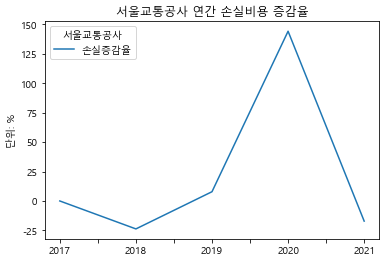

In [16]:
budget6
budget6.plot()
plt.title('서울교통공사 연간 손실비용 증감율')
plt.ylabel('단위: %')
print("증감율 =  [(최종수치-최초수치)/최초수치]*100")
print('ex =  2018년도 손실 증감율 (단위 : %)  = (2018손실비율-2017손실비율)/(2017 손실비율)*100)')

In [17]:
budget7=budget5[['손실비율']]
budget7

서울교통공사,손실비율
2017,35.57
2018,27.13
2019,29.26
2020,71.42
2021,59.20


**서울교통공사 매출액 대비 손실비용 비율 시각화**

<AxesSubplot:>

Text(0.5, 1.0, '서울교통공사 매출액 대비 손실비용 비율')

Text(0, 0.5, '단위: %')

손실액 비율(단위 : %) : 손실액 / 매출액 *100


서울교통공사,손실비율
2017,35.57
2018,27.13
2019,29.26
2020,71.42
2021,59.20


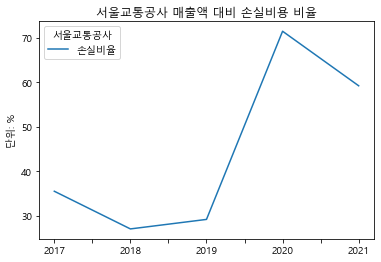

In [140]:

budget7.plot()
plt.title('서울교통공사 매출액 대비 손실비용 비율')
plt.ylabel('단위: %')
print('손실액 비율(단위 : %) : 손실액 / 매출액 *100')
budget7

In [19]:
budget8=budget5[['손실비율','손실증감율']]
budget8.columns.name='연도'
budget8

연도,손실비율,손실증감율
2017,35.57,0.00
2018,27.13,-23.73
2019,29.26,7.85
2020,71.42,144.09
2021,59.20,-17.11


**서울교통공사 매출액 대비 손실액 비율&손실비용 증감율 비교**

<AxesSubplot:>

Text(0.5, 1.0, '서울교통공사 매출액 대비 손실액 비율 & 손실비용 증감율 비교')

,2017,2018,2019,2020,2021
연도,,,,,
손실비율,35.57,27.13,29.26,71.42,59.20
손실증감율,0.00,-23.73,7.85,144.09,-17.11


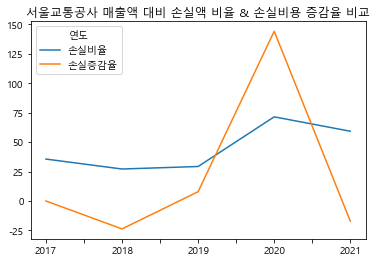

In [139]:
budget9=budget8.T

budget8.plot()
plt.title('서울교통공사 매출액 대비 손실액 비율 & 손실비용 증감율 비교')
budget9

### 2. 서울시 전체 인구수 대비 서울시 노령 인구수 분석 (1984-2021) 



**활용 데이터 인구추이(주민등록인구)(1984-2021) → 서울시 총인구 및 65세 인구 추이 현황**

**데이터 범주 시작점(1984): 65세 이상 노인층의 무임승차가 시작된 시기**


**데이터 불러오기**

In [21]:
seoul_count = pd.read_csv("teamproject/인구추이(주민등록인구)_20230207155306.csv",encoding='utf-8'
                  )
seoul_count

,구분별(1),구분별(2),1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,인구,소계,9501413,9639110,9798542,9991089,10286503,10576794,10612577,10904527,10969862,10925464,10798700,10595943,10469852,10389057,10321496,10321449,10373234,10331244,10280523,10276968,10287847,10297004,10356202,10421782,10456034,10464051,10575447,10528774,10442426,10388055,10369593,10297138,10204057,10124579,10049607,10010983,9911088,9736027,9667669
1,인구,한국인,9491503,9625755,9786536,9979577,10276308,10566447,10603250,10873055,10935230,10889499,10759454,10550871,10418076,10336134,10270506,10264260,10311314,10263336,10207295,10174086,10173162,10167344,10181166,10192710,10200827,10208302,10312545,10249679,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372
2,65세이상고령자,소계,275165,211283,304923,329370,348543,362507,362653,424332,434348,445236,454007,460144,469079,485347,505438,530190,560446,585897,612783,649755,693225,735902,786580,852235,898700,942946,1007572,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416,1667411


**데이터 정보 확인 및 크기 파악**

In [22]:
seoul_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분별(1)  3 non-null      object
 1   구분별(2)  3 non-null      object
 2   1984    3 non-null      int64 
 3   1985    3 non-null      int64 
 4   1986    3 non-null      int64 
 5   1987    3 non-null      int64 
 6   1988    3 non-null      int64 
 7   1989    3 non-null      int64 
 8   1990    3 non-null      int64 
 9   1991    3 non-null      int64 
 10  1992    3 non-null      int64 
 11  1993    3 non-null      int64 
 12  1994    3 non-null      int64 
 13  1995    3 non-null      int64 
 14  1996    3 non-null      int64 
 15  1997    3 non-null      int64 
 16  1998    3 non-null      int64 
 17  1999    3 non-null      int64 
 18  2000    3 non-null      int64 
 19  2001    3 non-null      int64 
 20  2002    3 non-null      int64 
 21  2003    3 non-null      int64 
 22  2004    3 non-null      int64 

In [23]:
seoul_count.shape

(3, 41)

**데이터 결측치 확인**

In [24]:
seoul_count.isnull().sum()

구분별(1)    0
구분별(2)    0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

In [25]:
seoul_count.isna().sum()

구분별(1)    0
구분별(2)    0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

**데이터 전처리**

In [26]:
seoul_count1=seoul_count.drop(1)
seoul_count1

,구분별(1),구분별(2),1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,인구,소계,9501413,9639110,9798542,9991089,10286503,10576794,10612577,10904527,10969862,10925464,10798700,10595943,10469852,10389057,10321496,10321449,10373234,10331244,10280523,10276968,10287847,10297004,10356202,10421782,10456034,10464051,10575447,10528774,10442426,10388055,10369593,10297138,10204057,10124579,10049607,10010983,9911088,9736027,9667669
2,65세이상고령자,소계,275165,211283,304923,329370,348543,362507,362653,424332,434348,445236,454007,460144,469079,485347,505438,530190,560446,585897,612783,649755,693225,735902,786580,852235,898700,942946,1007572,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416,1667411


In [27]:
seoul_count2=seoul_count1.T
seoul_count2

,0,2
구분별(1),인구,65세이상고령자
구분별(2),소계,소계
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332


In [28]:
seoul_count2=seoul_count2.drop(['구분별(1)','구분별(2)'])
seoul_count2

,0,2
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


In [29]:
seoul_count3=seoul_count2.rename(columns={0:'서울시 인구수',2:'65세이상 고령자'}) #칼럼이름 재설정
seoul_count3

,서울시 인구수,65세이상 고령자
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


**서울시 총인구& 서울시 거주 65세 고령자 인구 추이 시각화**

<AxesSubplot:>

Text(0.5, 1.0, '서울시 총인구 & 서울시 거주 65세 고령자 인구 추이')

Text(0, 0.5, '단위: 0.4=4백만 / 1.0=천만 명')

,서울시 인구수,65세이상 고령자
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


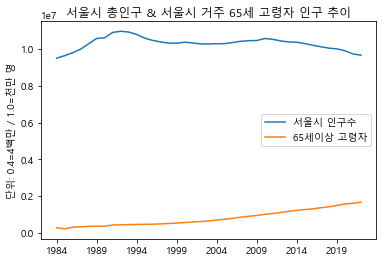

In [138]:

seoul_count3.plot()
plt.title('서울시 총인구 & 서울시 거주 65세 고령자 인구 추이')
plt.ylabel('단위: 0.4=4백만 / 1.0=천만 명')
seoul_count3.head(10)

### 3.서울교통공사의 지하철 총 무임비용 대비 노인 무임비용의 비율 분석

**활용 데이터 무임승차_대상별_현황 (2017-2021) → 연간 총 무임비용 및 노인 무임비용 추출**

**단위 : 백만원**

**데이터 불러오기**

In [31]:
seoul_old = pd.read_csv("teamproject/무임승차_대상별_현황_20230206161601.csv",encoding='cp949'
                  )
seoul_old

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,-,-,-,-,-,-,-,-,-,-,465831,625632,380263,510596,79858,107380,5392,7257,318,399,497095,666935,408946,548561,...,110617,5497,7348,327,409,358371,459355,293476,376924,60612,76881,3918,5075,365,475,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-
4,서울메트로 9호선(주),12440,15550,9746,12182,2529,3161,165,206,-,-,12824,16030,10156,12694,2508,3136,160,200,-,-,13750,17188,11024,13780,...,3183,180,225,-,-,9900,12375,7863,9829,1888,2360,133,166,16,20,10682,13352,8655,10819,1877,2346,133,166,17,21
5,서울교통공사9호선운영부문,1350,1688,1103,1379,228,285,19,24,-,-,1668,2085,1387,1734,252,315,29,36,-,-,4319,5399,3559,4449,...,725,180,225,-,-,3353,4191,2724,3406,459,573,170,212,-,-,3789,4736,3118,3897,485,606,186,233,-,-
6,부산교통공사,93418,124801,77631,103710,14854,19843,934,1248,-,-,95673,130636,79920,109126,14717,20095,1036,1415,-,-,102235,139620,85759,117118,...,20996,1102,1506,-,-,76634,104456,64212,87524,11611,15826,811,1106,-,-,80009,109034,67718,92284,11502,15675,789,1075,0,0
7,대구도시철도공사,43796,54745,36211,45264,7180,8975,405,506,-,-,45559,56949,37933,47416,7224,9030,402,503,-,-,49140,61425,41228,51535,...,9386,403,504,-,-,33314,41642,27784,34730,5268,6585,262,327,-,-,36742,45927,30933,38666,5540,6924,269,337,0,0
8,인천교통공사,18500,24975,14109,19047,4208,5681,183,247,-,-,20057,27077,15522,20955,4348,5870,187,252,-,-,21965,29653,17259,23300,...,6093,193,260,-,-,15745,-,12267,-,3347,-,131,-,-,-,17794,24022,14077,19004,3583,4838,134,180,0,0
9,광주광역시 도시철도공사,6202,8470,5092,6936,1017,1407,93,127,-,-,6326,8856,5262,7367,984,1378,80,111,-,-,6551,9172,5440,7616,...,1449,76,107,-,-,4468,6256,3625,5076,677,948,40,56,126,176,4564,6389,3660,5123,670,939,37,51,197,276


**데이터 크기 확인 및 결측치 확인**

In [32]:
seoul_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   운영기관별(1)  16 non-null     object
 1   2017      16 non-null     object
 2   2017.1    16 non-null     object
 3   2017.2    16 non-null     object
 4   2017.3    16 non-null     object
 5   2017.4    16 non-null     object
 6   2017.5    16 non-null     object
 7   2017.6    16 non-null     object
 8   2017.7    16 non-null     object
 9   2017.8    16 non-null     object
 10  2017.9    16 non-null     object
 11  2018      16 non-null     object
 12  2018.1    16 non-null     object
 13  2018.2    16 non-null     object
 14  2018.3    16 non-null     object
 15  2018.4    16 non-null     object
 16  2018.5    16 non-null     object
 17  2018.6    16 non-null     object
 18  2018.7    16 non-null     object
 19  2018.8    16 non-null     object
 20  2018.9    16 non-null     object
 21  2019      16 non-n

In [33]:
seoul_old.shape

(16, 51)

In [34]:
seoul_old.isnull().sum() #결측치 확인

운영기관별(1)    0
2017        0
2017.1      0
2017.2      0
2017.3      0
           ..
2021.5      0
2021.6      0
2021.7      0
2021.8      0
2021.9      0
Length: 51, dtype: int64

In [35]:
seoul_old.columns

Index(['운영기관별(1)', '2017', '2017.1', '2017.2', '2017.3', '2017.4', '2017.5',
       '2017.6', '2017.7', '2017.8', '2017.9', '2018', '2018.1', '2018.2',
       '2018.3', '2018.4', '2018.5', '2018.6', '2018.7', '2018.8', '2018.9',
       '2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6',
       '2019.7', '2019.8', '2019.9', '2020', '2020.1', '2020.2', '2020.3',
       '2020.4', '2020.5', '2020.6', '2020.7', '2020.8', '2020.9', '2021',
       '2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7',
       '2021.8', '2021.9'],
      dtype='object')

**데이터 전처리**

In [36]:
seoul_old1=seoul_old.iloc[[0,1,3],0:] # 필요한 index 0 : 무임승차 종류및 합계, 1: 무임승차 수 및 무임승차 비용, 3 : 서울교통공사의 값
seoul_old1 

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
3,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [37]:
seoul_old1.index

Int64Index([0, 1, 3], dtype='int64')

In [38]:
seoul_old2 = seoul_old1.rename(index = {0:'무임승차대상',1:'분석항목',3:'무임승차비용'})#인덱스 이름변경
seoul_old2 

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
무임승차대상,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
분석항목,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
무임승차비용,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


**서울교통공사의 값만 가져온 데이터 프레임과 인덱스 재설정으로 기존인덱스 제거**

In [39]:
seuol_old3=seoul_old2.drop('운영기관별(1)',axis=1) #서울교통공사의 값만 가져온 데이터 프레임과 인덱스 재설정으로 기존인덱스 제거
seuol_old3

,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
무임승차대상,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
분석항목,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
무임승차비용,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,45644,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [40]:
seuol_old3=seuol_old3.T # 인덱스와 칼럼값 위치 치환
seuol_old3

,무임승차대상,분석항목,무임승차비용
2017,계,무임승차 (천명),258250
2017.1,계,무임비용 (백만원),350647
2017.2,노인,무임승차 (천명),208466
2017.3,노인,무임비용 (백만원),283059
2017.4,장애인,무임승차 (천명),46405
2017.5,장애인,무임비용 (백만원),63000
2017.6,국가유공자,무임승차 (천명),3379
2017.7,국가유공자,무임비용 (백만원),4588
2017.8,기타,무임승차 (천명),-
2017.9,기타,무임비용 (백만원),-


**연도별 총 무임승차비용 및 총 무인승차이용객, 노인무인승차객 데이터추출**

In [41]:
mark=(seuol_old3['무임승차대상'] =='계')|(seuol_old3['무임승차대상'] =='노인')# 무임승차 대상 칼럼중 values 값이 계와 노인인 값만 필터링
seuol_old3=seuol_old3[mark]
seuol_old3

,무임승차대상,분석항목,무임승차비용
2017,계,무임승차 (천명),258250
2017.1,계,무임비용 (백만원),350647
2017.2,노인,무임승차 (천명),208466
2017.3,노인,무임비용 (백만원),283059
2018,계,무임승차 (천명),261047
2018.1,계,무임비용 (백만원),353974
2018.2,노인,무임승차 (천명),212843
2018.3,노인,무임비용 (백만원),288617
2019,계,무임승차 (천명),273841
2019.1,계,무임비용 (백만원),370926


In [42]:
mark2 =(seuol_old3.분석항목 =='무임비용 (백만원)')# 분항목 index중 무임비용값만 필터링
seuol_old4=seuol_old3[mark2]
seuol_old4=seuol_old4.T
seuol_old4

,2017.1,2017.3,2018.1,2018.3,2019.1,2019.3,2020.1,2020.3,2021.1,2021.3
무임승차대상,계,노인,계,노인,계,노인,계,노인,계,노인
분석항목,무임비용 (백만원),무임비용 (백만원),무임비용 (백만원),무임비용 (백만원),무임비용 (백만원),무임비용 (백만원),무임비용 (백만원),무임비용 (백만원),무임비용 (백만원),무임비용 (백만원)
무임승차비용,350647,283059,353974,288617,370926,304929,264255,216135,278438,231108


In [43]:
seuol_old4=seuol_old4.drop('분석항목')#필터링후 분석항목 index 제거
seuol_old4

,2017.1,2017.3,2018.1,2018.3,2019.1,2019.3,2020.1,2020.3,2021.1,2021.3
무임승차대상,계,노인,계,노인,계,노인,계,노인,계,노인
무임승차비용,350647,283059,353974,288617,370926,304929,264255,216135,278438,231108


In [44]:
total=seuol_old4.T
total

,무임승차대상,무임승차비용
2017.1,계,350647
2017.3,노인,283059
2018.1,계,353974
2018.3,노인,288617
2019.1,계,370926
2019.3,노인,304929
2020.1,계,264255
2020.3,노인,216135
2021.1,계,278438
2021.3,노인,231108


**총 무임승차비용 추출**

In [45]:
mark3=(total.무임승차대상 =='계')# 무임승차 대상 coㅣumns values중 '계'값만 추출
total1 =total[mark3].T
total1

,2017.1,2018.1,2019.1,2020.1,2021.1
무임승차대상,계,계,계,계,계
무임승차비용,350647,353974,370926,264255,278438


In [46]:
total2 = total1.drop('무임승차대상')#무임승차 대상 index 제거
total2

,2017.1,2018.1,2019.1,2020.1,2021.1
무임승차비용,350647,353974,370926,264255,278438


In [47]:
total2=total2.rename(index={'무임승차비용':'총 무임승차비용'})#index 이름 변경
total2

,2017.1,2018.1,2019.1,2020.1,2021.1
총 무임승차비용,350647,353974,370926,264255,278438


**노인 무임승차비용 추출**

In [48]:
old=seuol_old4.T
old.columns

Index(['무임승차대상', '무임승차비용'], dtype='object')

In [49]:
mark4=(old.무임승차대상 == '노인') # 무임승차대상 index값중 노인 값만 필터링하여 추출
old1=old[mark4].T
old1

,2017.3,2018.3,2019.3,2020.3,2021.3
무임승차대상,노인,노인,노인,노인,노인
무임승차비용,283059,288617,304929,216135,231108


In [50]:
old2 = old1.drop('무임승차대상')#무임승차 대상 index 제거
old2

,2017.3,2018.3,2019.3,2020.3,2021.3
무임승차비용,283059,288617,304929,216135,231108


In [51]:
old2=old2.rename(index={'무임승차비용':'노인 무임승차비용'})#index 이름 변경
old2

,2017.3,2018.3,2019.3,2020.3,2021.3
노인 무임승차비용,283059,288617,304929,216135,231108


**columns 정리**

In [52]:
# columns 를 년도별로 정리 ex : old2의 2017.3 -> 2017
old2=old2.rename(columns={'2017.3':'2017','2018.3':'2018','2019.3':'2019','2020.3':'2020','2021.3':'2021',})
total2=total2.rename(columns={'2017.1':'2017','2018.1':'2018','2019.1':'2019','2020.1':'2020','2021.1':'2021',})


old2
total2

,2017,2018,2019,2020,2021
노인 무임승차비용,283059,288617,304929,216135,231108


,2017,2018,2019,2020,2021
총 무임승차비용,350647,353974,370926,264255,278438


In [53]:
seoul_old5=pd.concat([old2,total2])#노인무임승차비용 데이터 프레임과 총 무임승차비용 데이터 프레임 합치기
seoul_old5

,2017,2018,2019,2020,2021
노인 무임승차비용,283059,288617,304929,216135,231108
총 무임승차비용,350647,353974,370926,264255,278438


**연도별 총 무임비용내 노인 무임 비용의 비율 삽입**

**총무임비용 내 노인무임비용 비율 (단위 :%) : 노인무임승차비용 / 총무임승차비용 *100**

In [54]:
seoul_old5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 노인 무임승차비용 to 총 무임승차비용
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2017    2 non-null      object
 1   2018    2 non-null      object
 2   2019    2 non-null      object
 3   2020    2 non-null      object
 4   2021    2 non-null      object
dtypes: object(5)
memory usage: 96.0+ bytes


In [55]:
seoul_old5=seoul_old5.astype(int)#values 값이 object 형이였기때문에 비율을 계산하기위하여 astype()로 int(정수)형으로 변환

In [56]:
seoul_old5=seoul_old5.T
seoul_old5

,노인 무임승차비용,총 무임승차비용
2017,283059,350647
2018,288617,353974
2019,304929,370926
2020,216135,264255
2021,231108,278438


In [57]:
seoul_old5['총무임비용 내 노인무임비용 비율']=round(seoul_old5['노인 무임승차비용']/seoul_old5['총 무임승차비용']*100,2)
#round 소수 두번째 자리까지 표현
seoul_old5

,노인 무임승차비용,총 무임승차비용,총무임비용 내 노인무임비용 비율
2017,283059,350647,80.72
2018,288617,353974,81.54
2019,304929,370926,82.21
2020,216135,264255,81.79
2021,231108,278438,83.00


In [58]:
seoul_old6=pd.DataFrame(seoul_old5['총무임비용 내 노인무임비용 비율'])#총무임비용 내 노인 무임비용 비율 만 추출하여 데이터 프레임 화
seoul_old6

,총무임비용 내 노인무임비용 비율
2017,80.72
2018,81.54
2019,82.21
2020,81.79
2021,83.00


**서울교통공사의 지하철 총 무임비용 대비 노인 무임비용의 비율 분석 시각화**

Text(0.5, 1.0, '서울교통공사의 지하철 총 무임승차비용 내 노인 무임승차비용의 비율 분석 ')

(60.0, 100.0)

Text(0.5, 0, '연도')

Text(0, 0.5, '단위 : %')

Text(0.0, 81.5272, '80.72')

Text(1.0, 82.3554, '81.54')

Text(2.0, 83.0321, '82.21')

Text(3.0, 82.6079, '81.79')

Text(4.0, 83.83, '83.0')

총무임비용 내 노인무임비용 비율 (단위 :%) : 노인무임승차비용 / 총무임승차비용 *100


,총무임비용 내 노인무임비용 비율
2017,80.72
2018,81.54
2019,82.21
2020,81.79
2021,83.00


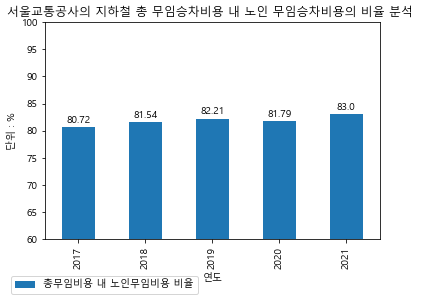

In [144]:
bar = seoul_old6.plot.bar()

plt.title('서울교통공사의 지하철 총 무임승차비용 내 노인 무임승차비용의 비율 분석 ')
plt.ylim(60,100)
plt.xlabel('연도')
plt.ylabel('단위 : %')
plt.legend(loc=(-0.1,-0.25))
for p in bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    bar.annotate(height, (left+width/2, height*1.01), ha='center')
print('총무임비용 내 노인무임비용 비율 (단위 :%) : 노인무임승차비용 / 총무임승차비용 *100')
seoul_old6

### 4. 서울 지하철(1 ~ 8호선)연간승차자 대비 무임승차자 분석

**활용 데이터 서울시 지하철 호선별 역별 유_무임 승하차 인원 정보(2015 - 2022) → 연간 승차자와 무임승차자 데이터 추출**

**서울교통공사가 운영하는 지하철 노선 : 1 ~ 8호선**

**1. 데이터 불러오기**

In [60]:
seoul_year = pd.read_csv("teamproject/서울시 지하철 호선별 역별 유_무임 승하차 인원 정보 (1).csv",encoding='cp949'
                  )
seoul_year

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
57389,201501,9호선,노량진,817907,864989,114416,119275,20150206
57390,201501,9호선,사평,70919,67069,14085,13931,20150206
57391,201501,9호선,노들,121496,100670,27470,25964,20150206
57392,201501,9호선,가양,469127,439698,107695,104082,20150206


**데이터확인 및 결측치 확인

In [61]:
seoul_year.info()
seoul_year.shape
seoul_year.columns
seoul_year.isna().sum()
seoul_year.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     57394 non-null  int64 
 1   호선명     57394 non-null  object
 2   지하철역    57394 non-null  object
 3   유임승차인원  57394 non-null  int64 
 4   무임승차인원  57394 non-null  int64 
 5   유임하차인원  57394 non-null  int64 
 6   무임하차인원  57394 non-null  int64 
 7   작업일자    57394 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.5+ MB


(57394, 8)

Index(['사용월', '호선명', '지하철역', '유임승차인원', '무임승차인원', '유임하차인원', '무임하차인원', '작업일자'], dtype='object')

사용월       0
호선명       0
지하철역      0
유임승차인원    0
무임승차인원    0
유임하차인원    0
무임하차인원    0
작업일자      0
dtype: int64

사용월       0
호선명       0
지하철역      0
유임승차인원    0
무임승차인원    0
유임하차인원    0
무임하차인원    0
작업일자      0
dtype: int64

**데이터 전처리**

**서울 지하철(1~8호선)의 연간 유임승차인원, 무임승차인원 추출**

In [62]:
seoul_year1=seoul_year[['사용월','유임승차인원','무임승차인원','호선명']]# 사용월, 유임승차인원, 무임승차인원, 호선명 columns 값만 호출
#서율 교통공사가 운행중인 호선은 1~8호선이기때문에 1~8호선 까지의 값만 isin()함수를 통해 필터링
seoul_year1 = seoul_year1[seoul_year1.호선명.isin(['1호선','2호선','3호선','4호선','5호선','6호선','7호선','8호선'])]
seoul_year1=seoul_year1.drop('호선명',axis=1)
seoul_year1

,사용월,유임승차인원,무임승차인원
0,202212,1350791,196523
1,202212,672846,96623
2,202212,975925,150911
3,202212,490967,309071
4,202212,476315,247835
...,...,...,...
57364,201501,269125,323557
57365,201501,225766,239659
57366,201501,347538,303534
57367,201501,512794,569800


**연도(2017~2021)별로 추출**

**서울교통공사의 출범이 2017년도 이기떄문에 2017년도부터의 데이터 값만 사용**

In [63]:
#2017~2021 년도의 데이터 값을 추출
mask = (seoul_year1.사용월>201700)&(seoul_year1.사용월<202200)
seoul_year2=seoul_year1[mask]
seoul_year2

,사용월,유임승차인원,무임승차인원
7968,202112,1023496,158933
7969,202112,217819,226280
7970,202112,755897,116282
7971,202112,407934,249355
7972,202112,359249,220044
...,...,...,...
44086,201701,149389,31768
44087,201701,397620,53803
44088,201701,241244,35878
44089,201701,251454,55460


**2017년도의 데이터값 추출**

**2017년도의 데이터값 추출**

In [64]:
mask1 = (seoul_year2.사용월<201800)
year = seoul_year2[mask1]
year.reset_index(inplace=True, drop=True)
year

year_20171=year.T
year_20171

year_20171['2017년']=year_20171.sum(axis=1)
year_20171

year_20172=pd.DataFrame(year_20171['2017년'])
year_20173=year_20172.drop('사용월')

year_20173

,사용월,유임승차인원,무임승차인원
0,201712,355005,137250
1,201712,174868,134444
2,201712,526470,321642
3,201712,296747,321443
4,201712,1341757,166079
...,...,...,...
3319,201701,149389,31768
3320,201701,397620,53803
3321,201701,241244,35878
3322,201701,251454,55460


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3299,3300,3301,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320,3321,3322,3323
사용월,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,...,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701
유임승차인원,355005,174868,526470,296747,1341757,705560,1485919,741139,381805,568364,2999217,2453067,1311016,940969,1779700,632152,802375,826102,584661,28201,517722,436308,499906,547673,1140749,...,359196,235393,199337,379959,480399,206309,223125,524944,105125,113149,117702,209828,252397,149982,87158,328780,463953,167936,277515,426368,149389,397620,241244,251454,353476
무임승차인원,137250,134444,321642,321443,166079,97384,211349,381909,121716,266374,175196,117894,98292,176469,171539,107291,114807,114714,67224,6356,61880,62507,82401,83849,216670,...,82207,55335,40195,43285,94341,35263,24264,66634,41372,40662,31011,53381,32378,35558,46993,66092,82793,52102,62246,78955,31768,53803,35878,55460,56167


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3300,3301,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320,3321,3322,3323,2017년
사용월,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,201712,...,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,201701,670472406
유임승차인원,355005,174868,526470,296747,1341757,705560,1485919,741139,381805,568364,2999217,2453067,1311016,940969,1779700,632152,802375,826102,584661,28201,517722,436308,499906,547673,1140749,...,235393,199337,379959,480399,206309,223125,524944,105125,113149,117702,209828,252397,149982,87158,328780,463953,167936,277515,426368,149389,397620,241244,251454,353476,1481364926
무임승차인원,137250,134444,321642,321443,166079,97384,211349,381909,121716,266374,175196,117894,98292,176469,171539,107291,114807,114714,67224,6356,61880,62507,82401,83849,216670,...,55335,40195,43285,94341,35263,24264,66634,41372,40662,31011,53381,32378,35558,46993,66092,82793,52102,62246,78955,31768,53803,35878,55460,56167,258326701


,2017년
유임승차인원,1481364926
무임승차인원,258326701


**2018년도의 데이터값 추출**

In [65]:
mask2 = (seoul_year2.사용월<201900)&(seoul_year2.사용월>201800)
year2 = seoul_year2[mask2]
year2.reset_index(inplace=True, drop=True)
year2

year_20181=year2.T
year_20181

year_20181['2018년']=year_20181.sum(axis=1)
year_20181

year_20182=pd.DataFrame(year_20181['2018년'])
year_20182


year_20183=year_20182.drop('사용월')
year_20183

,사용월,유임승차인원,무임승차인원
0,201812,1573438,227511
1,201812,341500,141192
2,201812,684631,393051
3,201812,718629,108220
4,201812,372140,123951
...,...,...,...
3596,201801,336625,69917
3597,201801,424191,45414
3598,201801,467153,88145
3599,201801,481517,65170


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
사용월,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,...,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801
유임승차인원,1573438,341500,684631,718629,372140,187159,287557,1240666,562548,485919,412033,1494600,1929213,360493,230353,1662655,1374785,38470,1433156,2921224,311506,1252275,375471,780513,2582981,...,344345,437511,279567,455167,404194,325328,404080,628313,90432,482599,281185,169139,216694,384044,102275,119758,126835,170498,131247,264009,336625,424191,467153,481517,269467
무임승차인원,227511,141192,393051,108220,123951,145104,327772,169334,272479,323495,92064,124032,253807,104796,66229,224241,148301,10504,211038,185634,50477,99780,69363,118184,227102,...,38165,74607,64627,67770,86598,78367,45602,91391,48226,87798,43652,39081,56928,64296,41340,44961,33928,51190,30899,63284,69917,45414,88145,65170,59193


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,2018년
사용월,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,201812,...,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,201801,726704237
유임승차인원,1573438,341500,684631,718629,372140,187159,287557,1240666,562548,485919,412033,1494600,1929213,360493,230353,1662655,1374785,38470,1433156,2921224,311506,1252275,375471,780513,2582981,...,437511,279567,455167,404194,325328,404080,628313,90432,482599,281185,169139,216694,384044,102275,119758,126835,170498,131247,264009,336625,424191,467153,481517,269467,1611106829
무임승차인원,227511,141192,393051,108220,123951,145104,327772,169334,272479,323495,92064,124032,253807,104796,66229,224241,148301,10504,211038,185634,50477,99780,69363,118184,227102,...,74607,64627,67770,86598,78367,45602,91391,48226,87798,43652,39081,56928,64296,41340,44961,33928,51190,30899,63284,69917,45414,88145,65170,59193,284184980


,2018년
사용월,726704237
유임승차인원,1611106829
무임승차인원,284184980


,2018년
유임승차인원,1611106829
무임승차인원,284184980


**2019년도의 데이터값 추출**

In [66]:
mask3 = (seoul_year2.사용월<202000)&(seoul_year2.사용월>201900)
year3 = seoul_year2[mask3]
year3.reset_index(inplace=True, drop=True)
year3

year_20191=year3.T
year_20191

year_20191['2019년']=year_20191.sum(axis=1)
year_20191

year_20192=pd.DataFrame(year_20191['2019년'])
year_20192

year_20193=year_20192.drop('사용월')
year_20193

,사용월,유임승차인원,무임승차인원
0,201912,324427,145423
1,201912,1275450,192545
2,201912,675882,412567
3,201912,178911,150023
4,201912,1586305,232973
...,...,...,...
3320,201901,482110,94403
3321,201901,526918,55650
3322,201901,121272,50492
3323,201901,136393,33395


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3300,3301,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320,3321,3322,3323,3324
사용월,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,...,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901
유임승차인원,324427,1275450,675882,178911,1586305,285500,577725,740715,451233,368841,67984,51758,1431502,562051,386986,323077,367717,813250,39735,1015144,29793,1927662,640210,1305991,1470994,...,380729,156543,341611,242722,656538,421756,195618,183531,153437,292774,198692,478470,413415,144085,262050,92614,264480,102217,505065,188435,482110,526918,121272,136393,336308
무임승차인원,145423,192545,412567,150023,232973,330880,289976,124589,321873,128403,18415,24678,214090,66075,72429,15770,106809,110286,10388,78855,6881,140529,104471,177830,239514,...,90652,35613,51722,47051,156569,98088,24974,37416,38289,48071,54118,99780,71595,43655,69327,54120,66036,44236,74945,63539,94403,55650,50492,33395,77979


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3301,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320,3321,3322,3323,3324,2019년
사용월,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,201912,...,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,201901,671339118
유임승차인원,324427,1275450,675882,178911,1586305,285500,577725,740715,451233,368841,67984,51758,1431502,562051,386986,323077,367717,813250,39735,1015144,29793,1927662,640210,1305991,1470994,...,156543,341611,242722,656538,421756,195618,183531,153437,292774,198692,478470,413415,144085,262050,92614,264480,102217,505065,188435,482110,526918,121272,136393,336308,1485206089
무임승차인원,145423,192545,412567,150023,232973,330880,289976,124589,321873,128403,18415,24678,214090,66075,72429,15770,106809,110286,10388,78855,6881,140529,104471,177830,239514,...,35613,51722,47051,156569,98088,24974,37416,38289,48071,54118,99780,71595,43655,69327,54120,66036,44236,74945,63539,94403,55650,50492,33395,77979,273902900


,2019년
사용월,671339118
유임승차인원,1485206089
무임승차인원,273902900


,2019년
유임승차인원,1485206089
무임승차인원,273902900


**2020년도의 데이터값 추출**

In [67]:
mask4 = (seoul_year2.사용월<202100)&(seoul_year2.사용월>202000)
year4 = seoul_year2[mask4]
year.reset_index(inplace=True, drop=True)
year4

year_20201=year4.T
year_20201
year_20201['2020년']=year_20201.sum(axis=1)
year_20201
year_20202=pd.DataFrame(year_20201['2020년'])
year_20202
year_20203=year_20202.drop('사용월')
year_20203

,사용월,유임승차인원,무임승차인원
15255,202012,284517,180822
15256,202012,305614,187492
15257,202012,708925,133421
15258,202012,169229,88712
15259,202012,193158,192893
...,...,...,...
22127,202001,446138,98581
22128,202001,182395,51413
22129,202001,459258,73210
22130,202001,260325,45044


,15255,15256,15257,15258,15259,15260,15261,15262,15263,15264,15265,15266,15267,15268,15269,15270,15271,15272,15273,15274,15275,15276,15277,15278,15279,...,22107,22108,22109,22110,22111,22112,22113,22114,22115,22116,22117,22118,22119,22120,22121,22122,22123,22124,22125,22126,22127,22128,22129,22130,22131
사용월,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,...,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001
유임승차인원,284517,305614,708925,169229,193158,98631,379344,264598,576469,224233,887612,987725,25286,221088,895543,583124,146622,561383,384889,427538,236875,359909,610176,353282,114510,...,438527,293466,231356,385889,264330,150251,263546,140698,176733,431831,410007,313290,90338,492853,244678,120438,129772,238883,100291,216568,446138,182395,459258,260325,126030
무임승차인원,180822,187492,133421,88712,192893,110088,49801,200056,91323,85301,129969,154716,4966,31657,108055,99995,9555,45996,52836,36190,70526,52805,77187,40427,23283,...,104139,84751,35288,44303,65569,33404,56811,34682,63638,87000,72625,75103,54490,55097,64880,51012,31166,67641,45261,57878,98581,51413,73210,45044,31791


,15255,15256,15257,15258,15259,15260,15261,15262,15263,15264,15265,15266,15267,15268,15269,15270,15271,15272,15273,15274,15275,15276,15277,15278,15279,...,22108,22109,22110,22111,22112,22113,22114,22115,22116,22117,22118,22119,22120,22121,22122,22123,22124,22125,22126,22127,22128,22129,22130,22131,2020년
사용월,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,202012,...,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,202001,675913784
유임승차인원,284517,305614,708925,169229,193158,98631,379344,264598,576469,224233,887612,987725,25286,221088,895543,583124,146622,561383,384889,427538,236875,359909,610176,353282,114510,...,293466,231356,385889,264330,150251,263546,140698,176733,431831,410007,313290,90338,492853,244678,120438,129772,238883,100291,216568,446138,182395,459258,260325,126030,1078559217
무임승차인원,180822,187492,133421,88712,192893,110088,49801,200056,91323,85301,129969,154716,4966,31657,108055,99995,9555,45996,52836,36190,70526,52805,77187,40427,23283,...,84751,35288,44303,65569,33404,56811,34682,63638,87000,72625,75103,54490,55097,64880,51012,31166,67641,45261,57878,98581,51413,73210,45044,31791,195747311


,2020년
사용월,675913784
유임승차인원,1078559217
무임승차인원,195747311


,2020년
유임승차인원,1078559217
무임승차인원,195747311


**2021년도의 데이터값 추출**

In [68]:
mask5 = (seoul_year2.사용월>202100)
year5 = seoul_year2[mask5]
year.reset_index(inplace=True, drop=True)
year5

year_20211=year5.T
year_20211
year_20211['2021년']=year_20211.sum(axis=1)
year_20211
year_20212=pd.DataFrame(year_20211['2021년'])
year_20212
year_20213=year_20212.drop('사용월')
year_20213

,사용월,유임승차인원,무임승차인원
7968,202112,1023496,158933
7969,202112,217819,226280
7970,202112,755897,116282
7971,202112,407934,249355
7972,202112,359249,220044
...,...,...,...
14926,202101,438382,39524
14927,202101,281607,45103
14928,202101,300789,54540
14929,202101,93546,29918


,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989,7990,7991,7992,...,14906,14907,14908,14909,14910,14911,14912,14913,14914,14915,14916,14917,14918,14919,14920,14921,14922,14923,14924,14925,14926,14927,14928,14929,14930
사용월,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,...,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101
유임승차인원,1023496,217819,755897,407934,359249,310669,261608,203911,504322,112756,190894,513079,139297,527139,432468,216985,544247,157245,479495,497366,370160,295802,400478,1316032,722883,...,150312,306455,410029,315182,359196,410548,243929,173192,135385,140087,142037,128850,107301,195288,82974,250372,352362,348486,70889,195947,438382,281607,300789,93546,199208
무임승차인원,158933,226280,116282,249355,220044,220908,101018,104871,65715,122515,11090,91349,39410,52803,50543,55583,101581,33220,89134,64735,63384,69511,44846,105062,127929,...,28259,66478,102651,66200,80368,63534,36229,45197,46120,35796,32840,27057,20556,42042,28558,56687,69654,50556,35069,49430,39524,45103,54540,29918,29283


,7968,7969,7970,7971,7972,7973,7974,7975,7976,7977,7978,7979,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989,7990,7991,7992,...,14907,14908,14909,14910,14911,14912,14913,14914,14915,14916,14917,14918,14919,14920,14921,14922,14923,14924,14925,14926,14927,14928,14929,14930,2021년
사용월,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,202112,...,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,202101,685343177
유임승차인원,1023496,217819,755897,407934,359249,310669,261608,203911,504322,112756,190894,513079,139297,527139,432468,216985,544247,157245,479495,497366,370160,295802,400478,1316032,722883,...,306455,410029,315182,359196,410548,243929,173192,135385,140087,142037,128850,107301,195288,82974,250372,352362,348486,70889,195947,438382,281607,300789,93546,199208,1077093116
무임승차인원,158933,226280,116282,249355,220044,220908,101018,104871,65715,122515,11090,91349,39410,52803,50543,55583,101581,33220,89134,64735,63384,69511,44846,105062,127929,...,66478,102651,66200,80368,63534,36229,45197,46120,35796,32840,27057,20556,42042,28558,56687,69654,50556,35069,49430,39524,45103,54540,29918,29283,205842048


,2021년
사용월,685343177
유임승차인원,1077093116
무임승차인원,205842048


,2021년
유임승차인원,1077093116
무임승차인원,205842048


**2017~2021의 데이터 프레임 병합**

In [117]:
seoul_year3=pd.concat([year_20173,year_20183,year_20193,year_20203,year_20213],axis=1)#concat()사용하여 병합
seoul_year3

,2017년,2018년,2019년,2020년,2021년
유임승차인원,1481364926,1611106829,1485206089,1078559217,1077093116
무임승차인원,258326701,284184980,273902900,195747311,205842048


**연간 무임승차인원 유임승차인원 시각화**

<AxesSubplot:>

Text(0.5, 1.0, '서울시 지하철(1호선~8호선) 유임승차인원 & 무임승차인원')

Text(0.5, 0, '연도')

Text(0, 0.5, '단위: 0.5=5억명 / 2.0=20억명')

,2017년,2018년,2019년,2020년,2021년
유임승차인원,1481364926,1611106829,1485206089,1078559217,1077093116
무임승차인원,258326701,284184980,273902900,195747311,205842048


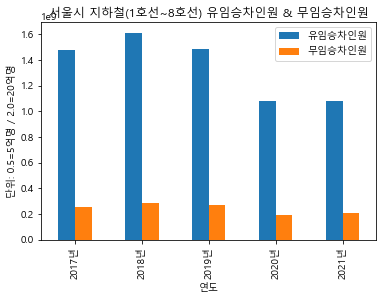

In [134]:
seoul_year3.T.plot.bar()
plt.title('서울시 지하철(1호선~8호선) 유임승차인원 & 무임승차인원')
plt.xlabel('연도')
plt.ylabel('단위: 0.5=5억명 / 2.0=20억명')
seoul_year3


**연간 서울시 지하철(1~8호선) 총 승차인원 대비 무임승차인원 비율**

**무임승차자 비율 (단위 :%) : 무임승차인원 / 합계(총 승차인원)*100**

In [71]:
seoul_year4=seoul_year3.T
seoul_year4['합계']=seoul_year4['무임승차인원']+seoul_year4['유임승차인원']#총 승차인원 계산후 삽입
seoul_year4


,유임승차인원,무임승차인원,합계
2017년,1481364926,258326701,1739691627
2018년,1611106829,284184980,1895291809
2019년,1485206089,273902900,1759108989
2020년,1078559217,195747311,1274306528
2021년,1077093116,205842048,1282935164


In [72]:
seoul_year4['무임승차자 비율']=round(seoul_year4['무임승차인원']/seoul_year4['합계']*100,2)#라운드 함수로 소수점 두번째 자리까지 호출
seoul_year4

,유임승차인원,무임승차인원,합계,무임승차자 비율
2017년,1481364926,258326701,1739691627,14.85
2018년,1611106829,284184980,1895291809,14.99
2019년,1485206089,273902900,1759108989,15.57
2020년,1078559217,195747311,1274306528,15.36
2021년,1077093116,205842048,1282935164,16.04


In [73]:
seoul_year5=seoul_year4[['무임승차자 비율']]# 무임승차자 비율만 추출
seoul_year5

,무임승차자 비율
2017년,14.85
2018년,14.99
2019년,15.57
2020년,15.36
2021년,16.04


**연간 무임승차자 비율 시각화**

Text(0.5, 1.0, '서울시 지하철(1~8호선) 연간 무임승차자 비율')

Text(0.5, 0, '연도')

Text(0, 0.5, '단위 :%')

Text(0.0, 14.9985, '14.85')

Text(1.0, 15.1399, '14.99')

Text(2.0, 15.7257, '15.57')

Text(3.0, 15.5136, '15.36')

Text(4.0, 16.2004, '16.04')

무임승차자 비율 (단위 :%) : 무임승차인원 / 합계(총 승차인원)*100


,무임승차자 비율
2017년,14.85
2018년,14.99
2019년,15.57
2020년,15.36
2021년,16.04


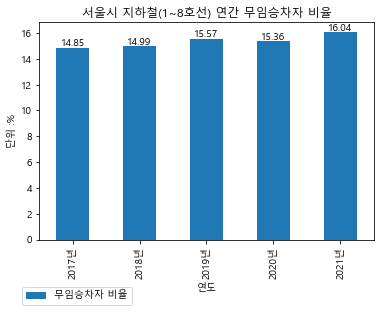

In [133]:
bar = seoul_year5.plot.bar()
plt.title('서울시 지하철(1~8호선) 연간 무임승차자 비율')
plt.xlabel('연도')
plt.ylabel('단위 :%')
for p in bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    bar.annotate(height, (left+width/2, height*1.01), ha='center')
plt.legend(loc=(-0.05,-0.3))
print('무임승차자 비율 (단위 :%) : 무임승차인원 / 합계(총 승차인원)*100')
seoul_year5

### 5. 지하철 호선별 승차자와 무임승차자 분석 (2017-2021)

**활용 데이터 서울시 지하철 호선별 역별 유_무임 승하차 인원 정보(2015 - 2022) → 1호선~8호선 데이터 추출**

**서울교통공사가 운영하는 지하철 노선 : 1 ~ 8호선**

**데이터 불러오기 (앞선 4번 데이터와 같기떄문에 명칭만 변경)**

In [75]:
seoul_line= seoul_year
seoul_line

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
57389,201501,9호선,노량진,817907,864989,114416,119275,20150206
57390,201501,9호선,사평,70919,67069,14085,13931,20150206
57391,201501,9호선,노들,121496,100670,27470,25964,20150206
57392,201501,9호선,가양,469127,439698,107695,104082,20150206


**호선별 유임승차인원 무임승차인원 추출**

In [76]:
seoul_line2=seoul_line[['호선명','유임승차인원','무임승차인원']]# 데이터에서 '호선명','유임승차인원','무임승차인원' 데이터만 호출
seoul_line2

,호선명,유임승차인원,무임승차인원
0,1호선,1350791,196523
1,1호선,672846,96623
2,1호선,975925,150911
3,1호선,490967,309071
4,1호선,476315,247835
...,...,...,...
57389,9호선,817907,864989
57390,9호선,70919,67069
57391,9호선,121496,100670
57392,9호선,469127,439698


In [119]:
# 서울 교통공사가 운영중인 지하철은 1~8호선이기때문에 1~8호선의 데이터 값만 필터링한후 호출
mark_line = (seoul_line2.호선명 == '1호선')

line1 = seoul_line2[mark_line]
line1.reset_index(inplace=True, drop=True)
line1

mark_line2 = (seoul_line2.호선명 == '2호선')

line2 = seoul_line2[mark_line2]
line2.reset_index(inplace=True, drop=True)
line2

mark_line3 = (seoul_line2.호선명 == '3호선')

line3 = seoul_line2[mark_line3]
line3.reset_index(inplace=True, drop=True)
line3

mark_line4 = (seoul_line2.호선명 == '4호선')

line4 = seoul_line2[mark_line4]
line4.reset_index(inplace=True, drop=True)
line4

mark_line5 = (seoul_line2.호선명 == '5호선')

line5 = seoul_line2[mark_line5]
line5.reset_index(inplace=True, drop=True)
line5

mark_line6 = (seoul_line2.호선명 == '6호선')

line6 = seoul_line2[mark_line6]
line6.reset_index(inplace=True, drop=True)
line6

mark_line7 = (seoul_line2.호선명 == '7호선')

line7 = seoul_line2[mark_line7]
line7.reset_index(inplace=True, drop=True)
line7

mark_line8 = (seoul_line2.호선명 == '8호선')

line8 = seoul_line2[mark_line8]
line8.reset_index(inplace=True, drop=True)
line8

,호선명,유임승차인원,무임승차인원
0,1호선,1350791,196523
1,1호선,672846,96623
2,1호선,975925,150911
3,1호선,490967,309071
4,1호선,476315,247835
...,...,...,...
995,1호선,639441,636014
996,1호선,850077,819933
997,1호선,1890411,1667163
998,1호선,582547,602667


,호선명,유임승차인원,무임승차인원
0,2호선,682510,59541
1,2호선,1330792,112244
2,2호선,621414,79716
3,2호선,320903,81514
4,2호선,366417,55918
...,...,...,...
4995,2호선,201426,189620
4996,2호선,1974870,1930373
4997,2호선,280645,303487
4998,2호선,2264435,2035737


,호선명,유임승차인원,무임승차인원
0,3호선,145759,28681
1,3호선,504350,116746
2,3호선,806051,247242
3,3호선,341170,135931
4,3호선,377800,76141
...,...,...,...
3395,3호선,38,0
3396,3호선,151167,155842
3397,3호선,252387,262774
3398,3호선,226673,240245


,호선명,유임승차인원,무임승차인원
0,4호선,199379,71831
1,4호선,439946,116475
2,4호선,481540,92348
3,4호선,550644,195252
4,4호선,693368,166319
...,...,...,...
2595,4호선,257256,283880
2596,4호선,661018,605985
2597,4호선,536173,470361
2598,4호선,343494,370255


,호선명,유임승차인원,무임승차인원
0,5호선,146660,50235
1,5호선,125326,38154
2,5호선,205092,36487
3,5호선,145240,48189
4,5호선,265147,41354
...,...,...,...
5224,5호선,75941,61823
5225,5호선,298972,241620
5226,5호선,229279,218496
5227,5호선,81161,98024


,호선명,유임승차인원,무임승차인원
0,6호선,404385,113028
1,6호선,79696,30865
2,6호선,94393,39602
3,6호선,61224,18725
4,6호선,17,3
...,...,...,...
3833,6호선,185728,207358
3834,6호선,64212,68735
3835,6호선,63070,72605
3836,6호선,317687,234766


,호선명,유임승차인원,무임승차인원
0,7호선,59111,9323
1,7호선,216908,42946
2,7호선,283888,94517
3,7호선,298014,84447
4,7호선,482896,125884
...,...,...,...
5045,7호선,278930,257383
5046,7호선,481456,526382
5047,7호선,341474,326733
5048,7호선,275945,250335


,호선명,유임승차인원,무임승차인원
0,8호선,447996,102796
1,8호선,362116,83858
2,8호선,242935,65691
3,8호선,155304,33380
4,8호선,448809,78527
...,...,...,...
1709,8호선,269125,323557
1710,8호선,225766,239659
1711,8호선,347538,303534
1712,8호선,512794,569800


**호선별 총 승객 삽입**

**1호선 총 승객 삽입**

In [121]:
line1_1=line1.T
line1_2=line1_1.drop('호선명')
line1_2['1호선']= line1_2.sum(axis=1)
line1_2
line1_3=pd.DataFrame(line1_2['1호선'])
line1_3
line1_4=line1_3.T
line1_4['합계']=line1_4['무임승차인원']+line1_4['유임승차인원']
line1_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1호선
유임승차인원,1350791,672846,975925,490967,476315,230076,288269,238529,344620,134207,1316422,653911,924585,485926,436948,220069,285012,233878,341039,135459,638454,893135,499373,442041,231006,...,413062,776822,302851,619323,1688548,312964,147391,251837,317717,510467,502934,520415,691413,1105535,336981,374981,286925,155556,1353882,639441,850077,1890411,582547,590927,551550094.0
무임승차인원,196523,96623,150911,309071,247835,120749,114634,257360,242950,137351,203139,97339,141959,300364,242398,117440,117073,266335,247954,151050,119508,153798,319982,260373,124571,...,405091,720776,300914,642545,1490571,368884,164950,252779,308150,532712,512176,516568,654549,1041530,390926,363032,285937,171171,1288680,636014,819933,1667163,602667,599790,244149418.0


,1호선
유임승차인원,551550094.0
무임승차인원,244149418.0


,유임승차인원,무임승차인원,합계
1호선,551550094.0,244149418.0,795699512.0


**2호선 총 승객 삽입**

In [123]:
line2_1=line2.T
line2_2=line2_1.drop('호선명')
line2_2['2호선']= line2_2.sum(axis=1)
line2_2
line2_3=pd.DataFrame(line2_2['2호선'])
line2_3
line2_4=line2_3.T
line2_4['합계']=line2_4['무임승차인원']+line2_4['유임승차인원']
line2_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,2호선
유임승차인원,682510,1330792,621414,320903,366417,332054,356131,449999,289301,597454,1044298,1023669,601937,854068,327289,2324994,568345,237836,1571585,1347796,1270522,2180108,790257,563758,422651,...,1521424,528644,542338,999733,370286,1765773,168690,89457,458205,21972,670303,800857,260252,28913,1242112,43967,1442997,487427,613297,201426,1974870,280645,2264435,1389174,3.715756e+09
무임승차인원,59541,112244,79716,81514,55918,93097,66127,54082,12947,57918,103377,91783,106468,117193,84304,209443,111484,45775,125851,217436,148559,161741,161653,89047,77447,...,1326153,459377,541379,951763,392134,1774970,181699,86155,434608,24048,636477,765740,259971,34082,1372098,47048,1476389,482581,663754,189620,1930373,303487,2035737,1370024,8.711875e+08


,2호선
유임승차인원,3.715756e+09
무임승차인원,8.711875e+08


,유임승차인원,무임승차인원,합계
2호선,3.715756e+09,871187547.0,4.586944e+09


**3호선 총 승객 삽입**

In [87]:
line3_1=line3.T
line3_2=line3_1.drop('호선명')
line3_2['3호선']= line3_2.sum(axis=1)
line3_2
line3_3=pd.DataFrame(line3_2['3호선'])
line3_3
line3_4=line3_3.T
line3_4['합계']=line3_4['무임승차인원']+line3_4['유임승차인원']
line3_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3호선
유임승차인원,145759,504350,806051,341170,377800,383523,90087,147966,601916,657238,233214,273362,47,245707,306068,181402,203819,844024,807381,112225,1325069,346770,755231,925619,287857,...,369269,196997,142654,180851,25624,450397,192798,211335,185160,185700,349755,599252,311663,1624401,661781,291181,211871,85583,274518,38,151167,252387,226673,1094512,1.291679e+09
무임승차인원,28681,116746,247242,135931,76141,138450,30343,63228,87134,98485,59191,52494,2,35700,81560,52281,57963,138187,71896,30332,199687,77061,123276,154547,64843,...,306792,181377,138225,157370,26567,414511,267603,250352,182259,166605,329772,644005,288566,1680989,720816,302218,192147,88449,237865,0,155842,262774,240245,1179984,3.797220e+08


,3호선
유임승차인원,1.291679e+09
무임승차인원,3.797220e+08


,유임승차인원,무임승차인원,합계
3호선,1.291679e+09,379722046.0,1.671401e+09


**4호선 총 승객 삽입**

In [88]:
line4_1=line4.T
line4_2=line4_1.drop('호선명')
line4_2['4호선']= line4_2.sum(axis=1)
line4_2
line4_3=pd.DataFrame(line4_2['4호선'])
line4_3
line4_4=line4_3.T
line4_4['합계']=line4_4['무임승차인원']+line4_4['유임승차인원']
line4_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599,4호선
유임승차인원,199379,439946,481540,550644,693368,831142,333862,631941,507893,547195,339877,998662,416628,469765,675484,842309,620804,308817,371510,156219,490888,243951,23066,412862,724208,...,1110438,610788,550301,47701,1211915,277180,381209,302175,588698,626466,904059,852351,1113556,829737,715599,138257,429323,24889,666658,257256,661018,536173,343494,837781,1.331388e+09
무임승차인원,71831,116475,92348,195252,166319,188411,109187,178741,115060,85210,70934,129626,144060,59612,117590,73768,180939,38494,54091,26301,53146,48107,11117,144207,104844,...,1073695,557234,619606,50075,1270131,520174,364110,279763,624002,710718,707117,716160,1221559,867245,784879,178987,381799,19409,619459,283880,605985,470361,370255,806517,3.951232e+08


,4호선
유임승차인원,1.331388e+09
무임승차인원,3.951232e+08


,유임승차인원,무임승차인원,합계
4호선,1.331388e+09,395123233.0,1.726511e+09


**5호선 총 승객 삽입**

In [89]:
line5_1=line5.T
line5_2=line5_1.drop('호선명')
line5_2['5호선']= line5_2.sum(axis=1)
line5_2
line5_3=pd.DataFrame(line5_2['5호선'])
line5_3
line5_4=line5_3.T
line5_4['합계']=line5_4['무임승차인원']+line5_4['유임승차인원']
line5_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,5205,5206,5207,5208,5209,5210,5211,5212,5213,5214,5215,5216,5217,5218,5219,5220,5221,5222,5223,5224,5225,5226,5227,5228,5호선
유임승차인원,146660,125326,205092,145240,265147,521722,335181,700117,690568,332908,399681,559022,179192,95644,245636,114419,813785,308265,361033,362728,155458,114897,487505,906496,359864,...,342973,184361,358222,416720,165380,220767,164977,731835,96204,280180,153883,404720,117400,126745,600408,387595,74933,368673,142028,75941,298972,229279,81161,172893,1.430004e+09
무임승차인원,50235,38154,36487,48189,41354,98667,90976,143145,156907,64085,80055,89098,28334,20606,74190,11331,56978,27404,64508,48692,36812,14570,68782,95829,98212,...,367506,200101,381433,379733,153365,217639,184503,666404,97412,312276,156795,421410,109441,127278,659127,374825,86829,288509,147647,61823,241620,218496,98024,185513,4.170849e+08


,5호선
유임승차인원,1.430004e+09
무임승차인원,4.170849e+08


,유임승차인원,무임승차인원,합계
5호선,1.430004e+09,417084867.0,1.847089e+09


**6호선 총 승객 삽입**

In [90]:
line6_1=line6.T
line6_2=line6_1.drop('호선명')
line6_2['6호선']= line6_2.sum(axis=1)
line6_2
line6_3=pd.DataFrame(line6_2['6호선'])
line6_3
line6_4=line6_3.T
line6_4['합계']=line6_4['무임승차인원']+line6_4['유임승차인원']
line6_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,3814,3815,3816,3817,3818,3819,3820,3821,3822,3823,3824,3825,3826,3827,3828,3829,3830,3831,3832,3833,3834,3835,3836,3837,6호선
유임승차인원,404385,79696,94393,61224,17,180772,289629,225424,347963,86257,341030,358648,381456,284602,214063,212352,461050,173577,202884,133720,283102,245047,49898,83603,88576,...,185346,58853,409940,134228,77928,144203,275664,162521,323986,85275,389623,206531,232348,15,197493,204664,316312,138988,317989,185728,64212,63070,317687,305071,818610998.0
무임승차인원,113028,30865,39602,18725,3,48999,82642,68881,56007,44463,76768,75377,40654,20728,47921,46564,75554,36618,19713,18083,31422,15346,13224,22035,19226,...,177165,55563,396462,129665,95553,126452,295316,195328,278397,87842,430057,180504,223012,0,209604,207291,323225,148372,318451,207358,68735,72605,234766,284002,237520002.0


,6호선
유임승차인원,818610998.0
무임승차인원,237520002.0


,유임승차인원,무임승차인원,합계
6호선,818610998.0,237520002.0,1.056131e+09


**7호선 총 승객 삽입**

In [91]:
line7_1=line7.T
line7_2=line7_1.drop('호선명')
line7_2['7호선']= line7_2.sum(axis=1)
line7_2
line7_3=pd.DataFrame(line7_2['7호선'])
line7_3
line7_4=line7_3.T
line7_4['합계']=line7_4['무임승차인원']+line7_4['유임승차인원']
line7_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,5026,5027,5028,5029,5030,5031,5032,5033,5034,5035,5036,5037,5038,5039,5040,5041,5042,5043,5044,5045,5046,5047,5048,5049,7호선
유임승차인원,59111,216908,283888,298014,482896,333009,424934,283840,224050,237253,251777,435630,356406,377344,137005,255888,369668,407424,354075,178913,464719,413073,587934,461502,146461,...,471891,357592,255619,378381,324627,197730,409635,446338,160639,221661,370450,206621,588155,315921,296356,138751,139483,252807,139748,278930,481456,341474,275945,385387,1.684307e+09
무임승차인원,9323,42946,94517,84447,125884,87882,106183,69354,43711,65379,62755,73243,94338,97176,34721,61504,79350,39805,58179,41434,77615,53073,61754,43656,35878,...,437811,372517,243775,385219,330774,192468,393489,442134,151493,228834,276574,190896,503242,234338,293571,122405,126558,241487,126401,257383,526382,326733,250335,362576,4.554912e+08


,7호선
유임승차인원,1.684307e+09
무임승차인원,4.554912e+08


,유임승차인원,무임승차인원,합계
7호선,1.684307e+09,455491233.0,2.139798e+09


**8호선 총 승객 삽입**

In [92]:
line8_1=line8.T
line8_2=line8_1.drop('호선명')
line8_2['8호선']= line8_2.sum(axis=1)
line8_2
line8_3=pd.DataFrame(line8_2['8호선'])
line8_3
line8_4=line8_3.T
line8_4['합계']=line8_4['무임승차인원']+line8_4['유임승차인원']
line8_4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,8호선
유임승차인원,447996,362116,242935,155304,448809,181978,207532,175439,515022,443788,231581,123638,325170,258348,111976,117138,91039,149860,445263,233762,152335,375167,192729,159508,511157,...,369023,299269,81119,267862,106320,105274,152957,152234,175781,115949,259593,434855,123234,117541,182864,90667,307412,157863,323192,269125,225766,347538,512794,135696,419787367.0
무임승차인원,102796,83858,65691,33380,78527,51022,61753,63532,61173,81474,37578,30846,74598,70664,40673,45034,51662,28322,103012,64355,34592,70311,59834,61872,60774,...,322095,263807,62698,253039,108366,110140,144568,183405,166092,105371,269234,378227,124379,121888,129434,69400,290929,170534,311127,323557,239659,303534,569800,129859,126591864.0


,8호선
유임승차인원,419787367.0
무임승차인원,126591864.0


,유임승차인원,무임승차인원,합계
8호선,419787367.0,126591864.0,546379231.0


**데이터 병합및 무임승차인원 합계 추출**

In [93]:
seoul_line3 = pd.concat([line1_4,line2_4,line3_4,line4_4,line5_4,line6_4,line7_4,line8_4])# 1~8호선 데이터 병합
seoul_line3

,유임승차인원,무임승차인원,합계
1호선,5.515501e+08,244149418.0,7.956995e+08
2호선,3.715756e+09,871187547.0,4.586944e+09
3호선,1.291679e+09,379722046.0,1.671401e+09
4호선,1.331388e+09,395123233.0,1.726511e+09
5호선,1.430004e+09,417084867.0,1.847089e+09
6호선,8.186110e+08,237520002.0,1.056131e+09
7호선,1.684307e+09,455491233.0,2.139798e+09
8호선,4.197874e+08,126591864.0,5.463792e+08


In [94]:
seoul_line4=seoul_line3[['무임승차인원','합계']]#무임승차 인원 합계 columns만 추출
seoul_line4

,무임승차인원,합계
1호선,244149418.0,7.956995e+08
2호선,871187547.0,4.586944e+09
3호선,379722046.0,1.671401e+09
4호선,395123233.0,1.726511e+09
5호선,417084867.0,1.847089e+09
6호선,237520002.0,1.056131e+09
7호선,455491233.0,2.139798e+09
8호선,126591864.0,5.463792e+08


**총승차인원 대비 무임승차인원 비율 삽입**

**무임승차자 비율(단위:%) : 무임승차인원/합계(총승차인원)*100** 

In [95]:
seoul_line4['무임승차자 비율'] = round(seoul_line4['무임승차인원']/seoul_line4['합계']*100,2)#round 함수로 소수점 두번째 자리만 호출
seoul_line4

,무임승차인원,합계,무임승차자 비율
1호선,244149418.0,7.956995e+08,30.68
2호선,871187547.0,4.586944e+09,18.99
3호선,379722046.0,1.671401e+09,22.72
4호선,395123233.0,1.726511e+09,22.89
5호선,417084867.0,1.847089e+09,22.58
6호선,237520002.0,1.056131e+09,22.49
7호선,455491233.0,2.139798e+09,21.29
8호선,126591864.0,5.463792e+08,23.17


**지하철 호선별 무임승차자 비율 시각화**

In [96]:
seoul_line5=seoul_line4['무임승차자 비율']

Text(0.5, 1.0, '서울시 지하철 호선별(1호선~8호선) 무임승차자 비율')

Text(0.5, 0, '지하철 호선')

Text(0, 0.5, '단위 : %')

Text(0.0, 30.9868, '30.68')

Text(1.0, 19.1799, '18.99')

Text(2.0, 22.9472, '22.72')

Text(3.0, 23.1189, '22.89')

Text(4.0, 22.805799999999998, '22.58')

Text(5.0, 22.7149, '22.49')

Text(6.0, 21.5029, '21.29')

Text(7.0, 23.4017, '23.17')

무임승차자 비율(단위:%) : 무임승차인원/합계(총승차인원)*100


,무임승차자 비율
1호선,30.68
2호선,18.99
3호선,22.72
4호선,22.89
5호선,22.58
6호선,22.49
7호선,21.29
8호선,23.17


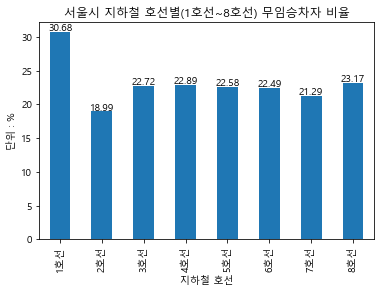

In [128]:

bar=seoul_line5.plot.bar()
plt.title('서울시 지하철 호선별(1호선~8호선) 무임승차자 비율')
plt.xlabel('지하철 호선')
plt.ylabel('단위 : %')
for p in bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    bar.annotate(height, (left+width/2, height*1.01), ha='center')
print('무임승차자 비율(단위:%) : 무임승차인원/합계(총승차인원)*100')
pd.DataFrame(seoul_line5)

### 6. 연도 별 서울교통공사 적자 비용 대비 노인 무임비용 비율 분석

**활용데이터 서울교통공사재무제표(2017-2021),무임승차_대상별_현황 (2017-2021)**

**1. 데이터 불러오기(앞선 서울교통공사재무제표(2017-2021) 데이터와 무임승차_대상별_현황 (2017-2021)중 서울교통공사 데이터)**

In [98]:
loss=budget3.T#서울교통공사 제무제표 데이터
loss

서울교통공사,매출액,손실액,손실비율,손실증감율
2017,1145373.0,407415.0,35.57,NaN
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


**데이터 전처리**

In [99]:
loss.columns.name='연도'#칼럼의 이름을 연도로 변경
loss

연도,매출액,손실액,손실비율,손실증감율
2017,1145373.0,407415.0,35.57,NaN
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [100]:
loss2=loss.drop('매출액',axis=1)#매출액 데이터 제거
loss2

연도,손실액,손실비율,손실증감율
2017,407415.0,35.57,NaN
2018,538892.0,27.13,-23.73
2019,586467.0,29.26,7.85
2020,1113736.0,71.42,144.09
2021,964440.0,59.20,-17.11


In [101]:
loss2.fillna(0, inplace=True)#fillna() 함수를 사용하여 결측치를 0으로 치환
loss2

연도,손실액,손실비율,손실증감율
2017,407415.0,35.57,0.00
2018,538892.0,27.13,-23.73
2019,586467.0,29.26,7.85
2020,1113736.0,71.42,144.09
2021,964440.0,59.20,-17.11


In [102]:
seoul_old5#서울교통공사 연도별 노인무임승차비용, 총무임승차비용,비율 데이터

,노인 무임승차비용,총 무임승차비용,총무임비용 내 노인무임비용 비율
2017,283059,350647,80.72
2018,288617,353974,81.54
2019,304929,370926,82.21
2020,216135,264255,81.79
2021,231108,278438,83.00


In [103]:
loss_free=pd.concat([loss2,seoul_old5],axis=1)#데이터 병합
loss_free

,손실액,손실비율,손실증감율,노인 무임승차비용,총 무임승차비용,총무임비용 내 노인무임비용 비율
2017,407415.0,35.57,0.00,283059,350647,80.72
2018,538892.0,27.13,-23.73,288617,353974,81.54
2019,586467.0,29.26,7.85,304929,370926,82.21
2020,1113736.0,71.42,144.09,216135,264255,81.79
2021,964440.0,59.20,-17.11,231108,278438,83.00


In [104]:
loss_free.drop('손실비율', axis=1, inplace=True)
loss_free.drop('손실증감율', axis=1, inplace=True)
loss_free.drop('총무임비용 내 노인무임비용 비율', axis=1, inplace=True)#손실비율,손실증감율,총무임비용내 노인무임비용 비율 데이터 제거
loss_free

,손실액,노인 무임승차비용,총 무임승차비용
2017,407415.0,283059,350647
2018,538892.0,288617,353974
2019,586467.0,304929,370926
2020,1113736.0,216135,264255
2021,964440.0,231108,278438


**서울교통공사 손실액과 1~8호선 지하철 무임승차 비용 데이터 추출**

In [105]:
loss_free1=loss_free.reindex(['손실액', '총 무임승차비용', '노인 무임승차비용'], axis = 1)#칼럼의 순서 변경
loss_free1

,손실액,총 무임승차비용,노인 무임승차비용
2017,407415.0,350647,283059
2018,538892.0,353974,288617
2019,586467.0,370926,304929
2020,1113736.0,264255,216135
2021,964440.0,278438,231108


**서울교통공사 손실액과 1~8호선 지하철 무임승차 비용 시각화**

<AxesSubplot:>

Text(0.5, 1.0, '서울교통공사 손실액과 1~8호선 지하철 무임승차 비용 비교')

Text(0, 0.5, '단위 : 0.2=2천억 / 1.0=1조')

,손실액,총 무임승차비용,노인 무임승차비용
2017,407415.0,350647,283059
2018,538892.0,353974,288617
2019,586467.0,370926,304929
2020,1113736.0,264255,216135
2021,964440.0,278438,231108


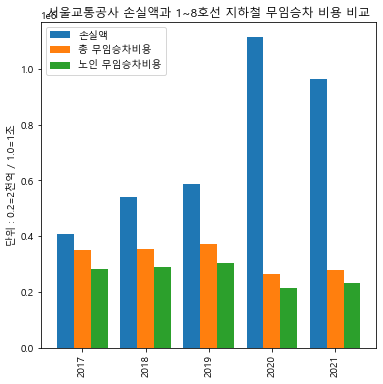

In [129]:
loss_free1.plot.bar(figsize=(6,6),width=0.8)
plt.title('서울교통공사 손실액과 1~8호선 지하철 무임승차 비용 비교')
plt.ylabel('단위 : 0.2=2천억 / 1.0=1조')
loss_free1

**참고**

**매출액 대비 적자비울 시각화**

**1~8호선 지하철 무임승차비용 내 노인 무임승차비 차지 비율**

<AxesSubplot:>

Text(0.5, 1.0, '서울교통공사 매출액 대비 적자 비율')

Text(0, 0.5, '단위:%')

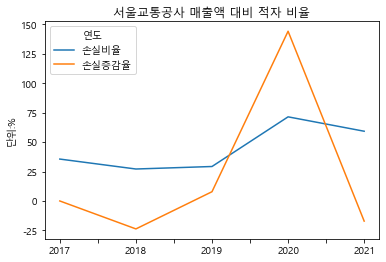

In [107]:
#1번 자료 참고 필요
budget8.plot()
plt.title('서울교통공사 매출액 대비 적자 비율')
plt.ylabel('단위:%')

Text(0.5, 1.0, '서울교통공사의 지하철 총 무임승차비용 내 노인 무임승차비용의 비율 분석 ')

Text(0.5, 0, '연도')

Text(0, 0.5, '단위 : %')

Text(0.0, 81.5272, '80.72')

Text(1.0, 82.3554, '81.54')

Text(2.0, 83.0321, '82.21')

Text(3.0, 82.6079, '81.79')

Text(4.0, 83.83, '83.0')

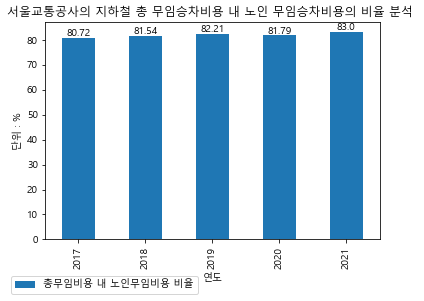

In [108]:
#3번 자료 참고 필요
bar = seoul_old6.plot.bar()

plt.title('서울교통공사의 지하철 총 무임승차비용 내 노인 무임승차비용의 비율 분석 ')
plt.xlabel('연도')
plt.ylabel('단위 : %')
plt.legend(loc=(-0.1,-0.25))
for p in bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    bar.annotate(height, (left+width/2, height*1.01), ha='center')

**손실비용 내 무임비용 차지비율및 노인무임비용 차지비율**

**손실비용 내 무임승차비용 비율(단위:%) : 총 무임승차비용 / 손실액 *100**

**손실비용 내 노인무임승차비용 비율(단위:%) : 노인 무임승차비용 / 손실액 *100**

In [109]:
# round 함수를 사용하여 소수점 두번째 자리만 호출
rdata={'2017' :[round(loss_free['총 무임승차비용']['2017']/loss_free['손실액']['2017']*100, 2)],
       '2018' :[round(loss_free['총 무임승차비용']['2018']/loss_free['손실액']['2018']*100, 2)],
       '2019' :[round(loss_free['총 무임승차비용']['2019']/loss_free['손실액']['2019']*100, 2)],
       '2020' :[round(loss_free['총 무임승차비용']['2020']/loss_free['손실액']['2020']*100, 2)],
       '2021': [round(loss_free['총 무임승차비용']['2021']/loss_free['손실액']['2021']*100, 2)]}
rdata

{'2017': [86.07],
 '2018': [65.69],
 '2019': [63.25],
 '2020': [23.73],
 '2021': [28.87]}

In [110]:
r_line= pd.DataFrame(data=rdata, index=['손실비용 내 무임승차비용 비율'])#딕셔너리 데이터를 데이터 프레임으로 변경
r_line

,2017,2018,2019,2020,2021
손실비용 내 무임승차비용 비율,86.07,65.69,63.25,23.73,28.87


In [111]:
# round 함수를 사용하여 소수점 두번째 자리만 호출
rdata2={'2017' :[round(loss_free['노인 무임승차비용']['2017']/loss_free['손실액']['2017']*100, 2)],
       '2018' :[round(loss_free['노인 무임승차비용']['2018']/loss_free['손실액']['2018']*100, 2)],
       '2019' :[round(loss_free['노인 무임승차비용']['2019']/loss_free['손실액']['2019']*100, 2)],
       '2020' :[round(loss_free['노인 무임승차비용']['2020']/loss_free['손실액']['2020']*100, 2)],
       '2021': [round(loss_free['노인 무임승차비용']['2021']/loss_free['손실액']['2021']*100, 2)]}
rdata2

{'2017': [69.48],
 '2018': [53.56],
 '2019': [51.99],
 '2020': [19.41],
 '2021': [23.96]}

In [112]:
r_line2= pd.DataFrame(data=rdata2, index=['손실비용 내 노인무임승차비용 비율'])#딕셔너리 데이터를 데이터 프레임으로 변경
r_line2

,2017,2018,2019,2020,2021
손실비용 내 노인무임승차비용 비율,69.48,53.56,51.99,19.41,23.96


In [113]:
#손실비용내  무임승차비용 비율과 손실비용 내 노인 무임 승차비용 비율 데이터 프레임 병합
r_line3= pd.concat([r_line.T,r_line2.T], axis=1) 
r_line3

,손실비용 내 무임승차비용 비율,손실비용 내 노인무임승차비용 비율
2017,86.07,69.48
2018,65.69,53.56
2019,63.25,51.99
2020,23.73,19.41
2021,28.87,23.96


**손실비용 내 무임비용 차지비율 및 노인무임비용 차지비율 시각화**

,손실비용 내 무임승차비용 비율,손실비용 내 노인무임승차비용 비율
2017,86.07,69.48
2018,65.69,53.56
2019,63.25,51.99
2020,23.73,19.41
2021,28.87,23.96


<AxesSubplot:>

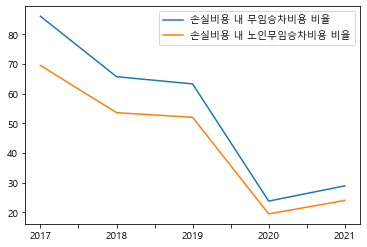

In [130]:
r_line3
r_line3.plot()

Text(0.5, 1.0, '서울교통공사 손실비용 내 1~8호선 지하철 무임승차 비용 비율 분석')

Text(0, 0.5, '단위:%')

Text(-0.08333333333333334, 86.93069999999999, '86.07')

Text(0.9166666666666666, 66.3469, '65.69')

Text(1.9166666666666667, 63.8825, '63.25')

Text(2.9166666666666665, 23.9673, '23.73')

Text(3.9166666666666665, 29.1587, '28.87')

Text(0.16666666666666666, 70.1748, '69.48')

Text(1.1666666666666667, 54.095600000000005, '53.56')

Text(2.1666666666666665, 52.5099, '51.99')

Text(3.1666666666666665, 19.6041, '19.41')

Text(4.166666666666667, 24.1996, '23.96')

손실비용 내 무임승차비용 비율(단위:%) : 총 무임승차비용 / 손실액 *100
손실비용 내 노인무임승차비용 비율(단위:%) : 노인 무임승차비용 / 손실액 *100


,손실비용 내 무임승차비용 비율,손실비용 내 노인무임승차비용 비율
2017,86.07,69.48
2018,65.69,53.56
2019,63.25,51.99
2020,23.73,19.41
2021,28.87,23.96


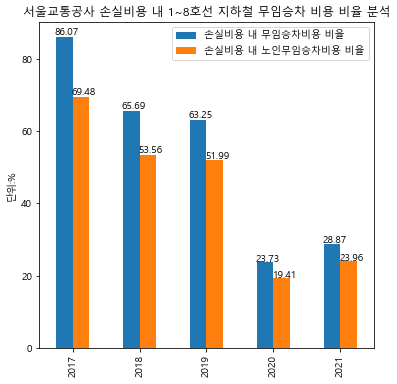

In [132]:
#막대 그래프로 활용
bar=r_line3.plot.bar(figsize=(6,6))
plt.title('서울교통공사 손실비용 내 1~8호선 지하철 무임승차 비용 비율 분석')
plt.ylabel('단위:%')
for p in bar.patches:
    left, bottom, width, height = p.get_bbox().bounds
    bar.annotate(height, (left+width/1.5, height*1.01), ha='center')
print('손실비용 내 무임승차비용 비율(단위:%) : 총 무임승차비용 / 손실액 *100')

print('손실비용 내 노인무임승차비용 비율(단위:%) : 노인 무임승차비용 / 손실액 *100')
r_line3

In [116]:
r_line4=pd.concat([loss_free1, r_line3], axis=1)
r_line4

,손실액,총 무임승차비용,노인 무임승차비용,손실비용 내 무임승차비용 비율,손실비용 내 노인무임승차비용 비율
2017,407415.0,350647,283059,86.07,69.48
2018,538892.0,353974,288617,65.69,53.56
2019,586467.0,370926,304929,63.25,51.99
2020,1113736.0,264255,216135,23.73,19.41
2021,964440.0,278438,231108,28.87,23.96
